In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [185]:
df = pd.read_csv("red_wine.csv", sep = ";")
# df.drop("No", axis = 1, inplace = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [186]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


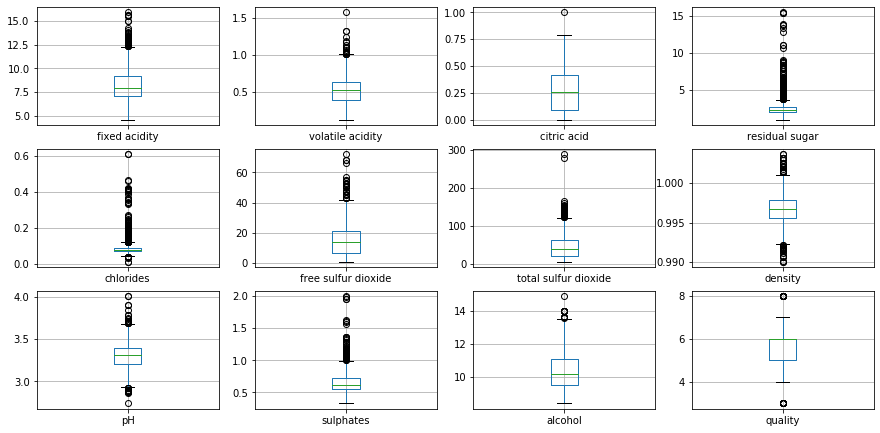

In [188]:
plt.figure(figsize = (15, 10))
numerical = df.columns
for i in range(1, len(numerical)+1):
    plt.subplot(4,4,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

In [189]:
for i in range(1, len(numerical)+1):
    
    iqr = df[numerical[i-1]].quantile(0.75) - df[numerical[i-1]].quantile(0.25)
    min_val = df[numerical[i-1]].quantile(0.25) - (iqr * 1.5)
    max_val = df[numerical[i-1]].quantile(0.75) + (iqr * 1.5)
    df[numerical[i-1]] = np.where(df[numerical[i-1]] > max_val, max_val, df[numerical[i-1]])
    df[numerical[i-1]] = np.where(df[numerical[i-1]] < min_val, min_val, df[numerical[i-1]])



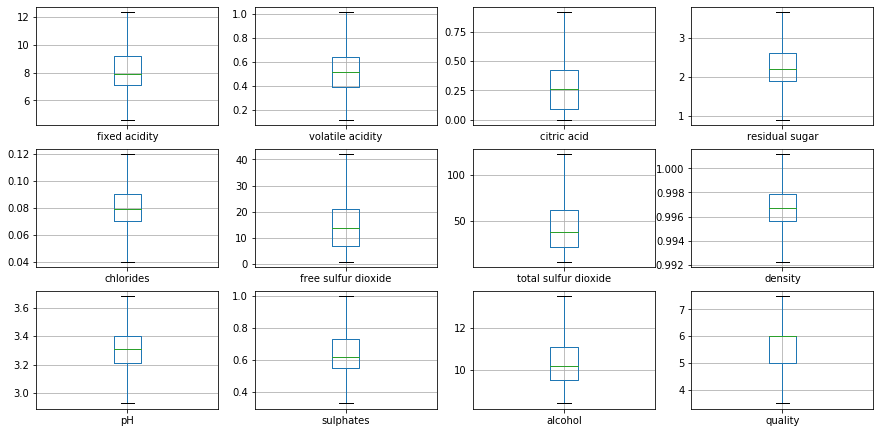

In [190]:
plt.figure(figsize = (15, 10))
numerical = df.columns
for i in range(1, len(numerical)+1):
    plt.subplot(4,4,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

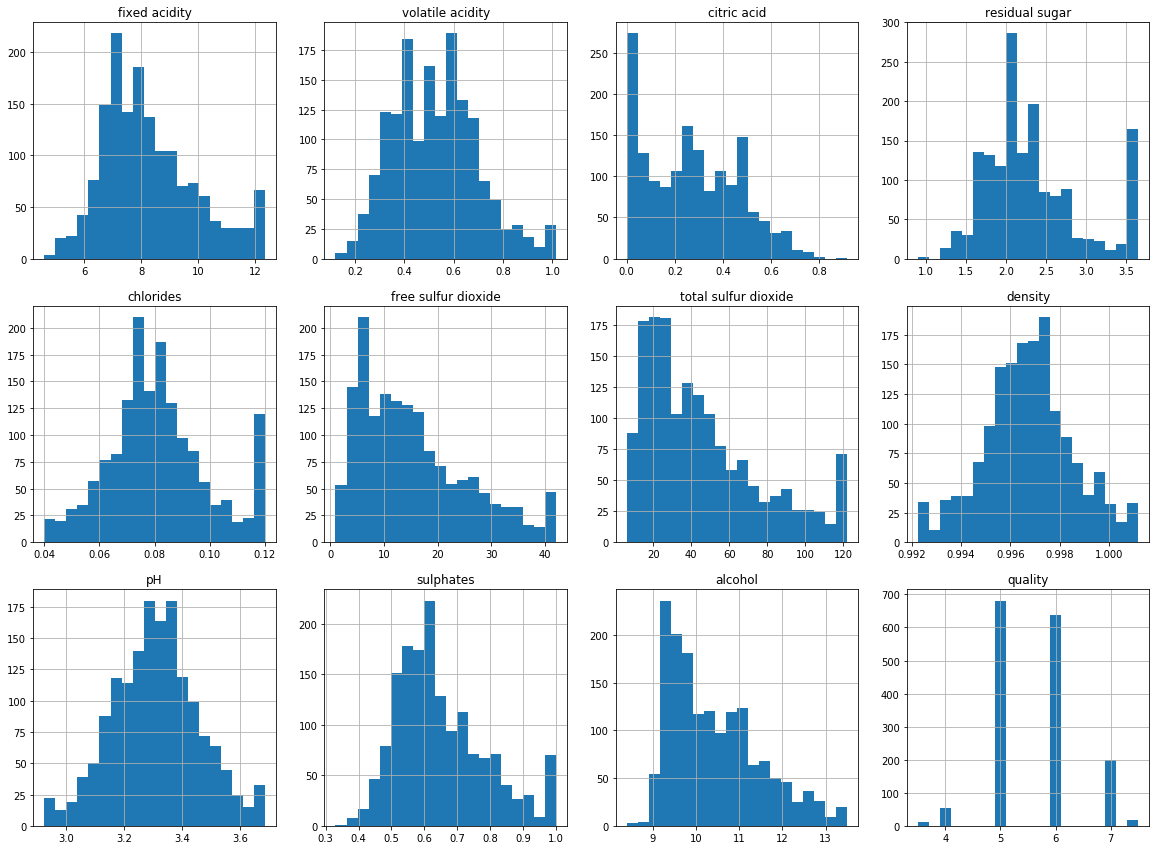

In [191]:
plt.figure(figsize = (20, 20))

for i in range(1, len(numerical)+1):
    plt.subplot(4,4,i)
    fig = df[numerical[i-1]].hist(bins = 20)
    fig.set_title(numerical[i-1])


In [192]:
x = df.drop("quality", axis = 1)
y = df["quality"]

In [193]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

In [194]:
from sklearn.preprocessing import StandardScaler
encoder = StandardScaler()
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)


In [195]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
model = RandomForestRegressor(random_state=1234)

In [197]:
model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [198]:
y_pred = model.predict(xtest)

In [199]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_pred)

In [200]:
r2_score(ytest, y_pred)

0.4162342470649544

In [201]:
mse ** 0.5

0.5781993060355572

In [202]:
ytrain.unique()

array([5. , 6. , 7. , 4. , 3.5, 7.5])

In [177]:
model.score(xtrain, ytrain)

0.9319536674472444

In [178]:
model.score(xtest, ytest)

0.4162342470649544